# Background

Villa Urquiza is one of the neighborhoods in which the City of Buenos Aires (CABA) is divided. It has a surface of 5.6 km2. It used to be a low-density residential neighborhood with a high middle-class population. Now it has become a more medium -density area, still mostly residential, giving the possibility of medium size buildings. The center of the neighborhood has a subway station, facilitating transport to central CABA.


# 1)Business Problem

A group of investors is looking for possible venue’s investments in Villa Urquiza, Buenos Aires, CABA. This type of investors focuses on niche markets, where competition is not a crucial factor. 

--> They would like to know what type of venue they should invest in and where it should be located.

# 2)Data Needed

For solving this problem, we will be using the Foursquare API data and geolocalization maps. The data required will be the list of all the venues in Villa Urquiza, with its category, location and Rating. With further manipulation of this features, we will get the niches venues in Villa Urquiza, with its corresponding Rating Average. The conclusion will be the recommendation of a certain venue with its preferable location.

Additionally, online searching will be required for completing the information required for the analysis.


# 3)CODE

In [1]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.1.0               |           py36_0         724 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

## 3.1)Searching venues in Villa Urquiza Buenos Aires

### 3.1.1) Geolocalization of Villa Urquiza, Buenos Aires

In [2]:
# Buenos Aires Villa Urquiza
address = 'Villa Urquiza, Buenos Aires, CABA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


-34.5732414 -58.4914785


### 3.1.2) FourSquare API Connection and Data:

In [3]:
CLIENT_ID = 'PESQIFIZTNDBTMZPSPLZXDCQVGVQT50IE3K1RP3QCQALSDCV' # your Foursquare ID
CLIENT_SECRET = 'ODUYPM1K0ZG1Z0LZTM4GE5IRA0KSMBARQMVDJWAD0HC04UBW' # your Foursquare Secret
VERSION = '20181018'
LIMIT = 300
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PESQIFIZTNDBTMZPSPLZXDCQVGVQT50IE3K1RP3QCQALSDCV
CLIENT_SECRET:ODUYPM1K0ZG1Z0LZTM4GE5IRA0KSMBARQMVDJWAD0HC04UBW


In [4]:
radius = 5000 # Esta en metros
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=PESQIFIZTNDBTMZPSPLZXDCQVGVQT50IE3K1RP3QCQALSDCV&client_secret=ODUYPM1K0ZG1Z0LZTM4GE5IRA0KSMBARQMVDJWAD0HC04UBW&ll=-34.5732414,-58.4914785&v=20181018&radius=1000&limit=300'

In [5]:
import requests

### 3.1.3) FourSquare API Results:

In [6]:
results = requests.get(url).json()
'There are {} popular space around Villa Urquiza.'.format(len(results['response']['groups'][0]['items']))

'There are 100 popular space around Villa Urquiza.'

In [7]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4e51df2a2271a1bdc400255b',
  'name': 'Oggi',
  'location': {'address': 'Bucarelli 2753',
   'crossStreet': 'Nahuel Huapi',
   'lat': -34.5727641602655,
   'lng': -58.491194768062314,
   'labeledLatLngs': [{'label': 'display',
     'lat': -34.5727641602655,
     'lng': -58.491194768062314}],
   'distance': 59,
   'postalCode': 'C1431DRG',
   'cc': 'AR',
   'city': 'Buenos Aires',
   'state': 'Buenos Aires C.F.',
   'country': 'Argentina',
   'formattedAddress': ['Bucarelli 2753 (Nahuel Huapi)',
    'C1431DRG Buenos Aires',
    'Buenos Aires C.F.',
    'Argentina']},
  'categories': [{'id': '4bf58dd8d48988d107951735',
    'name': 'Shoe Store',
    'pluralName': 'Shoe Stores',
    'shortName': 'Shoes',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_shoestore_',
     'suffix': '.png'},
    'primary': 

In [8]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [9]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]



## 3.2) All Villa Urquiza Venues:

In [10]:
dataframe_filtered

data_pm = dataframe_filtered[dataframe_filtered["city"] == "Villa Urquiza"]
data_pm

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
2,Las Violetas,Bakery,Nahuel Huapi 5300,AR,Villa Urquiza,Argentina,esq. Bucarelli,80,"[Nahuel Huapi 5300 (esq. Bucarelli), 1431 Vill...","[{'label': 'display', 'lat': -34.5726229433245...",-34.572623,-58.491023,NaN,1431,Buenos Aires C.F.,4b783b8cf964a5205dbe2ee3
10,Al Rayan,Middle Eastern Restaurant,Blanco Encalada 4902,AR,Villa Urquiza,Argentina,esq. Díaz Colodrero,640,"[Blanco Encalada 4902 (esq. Díaz Colodrero), C...","[{'label': 'display', 'lat': -34.5747784614418...",-34.574778,-58.484741,NaN,C1431CDL,Buenos Aires C.F.,4d38eb2476d1a35dc5af028e
11,Demetrio,Liquor Store,Av. Triunvirato 4450,AR,Villa Urquiza,Argentina,e/ Olazábal y Mendoza,784,"[Av. Triunvirato 4450 (e/ Olazábal y Mendoza),...","[{'label': 'display', 'lat': -34.5762139701674...",-34.576214,-58.483722,Villa Urquiza,C1431FBU,Buenos Aires C.F.,4d8bb3285444a1cd9d13ff73
12,Cake & Coffee,Coffee Shop,Dr. Pedro Ignacio Rivera 4992,AR,Villa Urquiza,Argentina,e/ Díaz Colodrero y Pacheco,452,[Dr. Pedro Ignacio Rivera 4992 (e/ Díaz Colodr...,"[{'label': 'display', 'lat': -34.5714789058843...",-34.571479,-58.487032,Villa Urquiza,C1431BVJ,Buenos Aires C.F.,4f9c34afe4b07e720d880b94
13,Heladería Italia,Ice Cream Shop,Av. Triunvirato 4546,AR,Villa Urquiza,Argentina,entre Blanco Encalada y Olazábal,628,[Av. Triunvirato 4546 (entre Blanco Encalada y...,"[{'label': 'display', 'lat': -34.5753835866038...",-34.575384,-58.485138,Villa Urquiza,C1431FBV,Buenos Aires C.F.,4b8729aff964a52014b431e3
17,Adaggio,Ice Cream Shop,Olazabal 5598,AR,Villa Urquiza,Argentina,esq. Ceretti,738,"[Olazabal 5598 (esq. Ceretti), C1431CGY Villa ...","[{'label': 'display', 'lat': -34.5798736809017...",-34.579874,-58.491617,NaN,C1431CGY,Buenos Aires C.F.,4bc359e2abf49521f79fc393
19,Cremolatti,Ice Cream Shop,Avenida Triunvirato 4800,AR,Villa Urquiza,Argentina,esq. Avenida Franklin D. Roosevelt,400,[Avenida Triunvirato 4800 (esq. Avenida Frankl...,"[{'label': 'display', 'lat': -34.5738376376613...",-34.573838,-58.487172,NaN,C1431FCN,Buenos Aires C.F.,542ec57a498ecb8ef93874ff
22,Estilo Misión,Restaurant,Mendoza 5100,AR,Villa Urquiza,Argentina,esq. Ávalos,855,"[Mendoza 5100 (esq. Ávalos), C1431CIL Villa Ur...","[{'label': 'display', 'lat': -34.5773005233663...",-34.577301,-58.483556,"Villa Urquiza, Buenos Aires, Buenos Aires F.D.",C1431CIL,Buenos Aires C.F.,4b774731f964a5203a8e2ee3
25,Unaghi Sushi Bar,Sushi Restaurant,Olazábal 4690,AR,Villa Urquiza,Argentina,esq. Av. Álvarez Thomas,905,"[Olazábal 4690 (esq. Av. Álvarez Thomas), 1431...","[{'label': 'display', 'lat': -34.5740170900742...",-34.574017,-58.481647,NaN,1431,Buenos Aires C.F.,4d928498b32737047f888425
27,Código Crossfit,Athletics & Sports,Avenida Monroe 4850,AR,Villa Urquiza,Argentina,Avenida Álvarez Thomas,749,"[Avenida Monroe 4850 (Avenida Álvarez Thomas),...","[{'label': 'display', 'lat': -34.5726046379469...",-34.572605,-58.483333,NaN,1431,Buenos Aires C.F.,52a4abc4498e1e66f8e64ae1


### 3.2.1) Grouped by type of venue.

In [11]:
group = data_pm.groupby("categories").count()
group1 = group[["name"]]
group1.rename(columns={"name":"Count"},inplace= True)
group1.sort_values("Count",ascending = False,inplace= True)
group1.reset_index(level=0, inplace=True)
group1

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,categories,Count
0,Ice Cream Shop,6
1,Bakery,3
2,Grocery Store,2
3,Japanese Restaurant,1
4,Sushi Restaurant,1
5,Restaurant,1
6,Pharmacy,1
7,Middle Eastern Restaurant,1
8,Mexican Restaurant,1
9,Lounge,1


### - Base on the information , is not convenient investing in a ice cream shop nor a Restaurant.

### 3.2.2) Distribution of the venues

In [12]:
# create map of New York using latitude and longitude values
map_pm = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, category in zip(data_pm['lat'], data_pm['lng'],data_pm["categories"]):
    label = '{}'.format(category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pm)  
    
map_pm

## 3.2.3) Adding Rating information

In [13]:
# Rating
rating =[]
for venue in data_pm['id'] :
    venue_id = venue
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        rating.append(result['response']['venue']['rating'])
    except:
        rating.append("NaN")


data_pm["Rating"] = rating
data_pm

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Rating
2,Las Violetas,Bakery,Nahuel Huapi 5300,AR,Villa Urquiza,Argentina,esq. Bucarelli,80,"[Nahuel Huapi 5300 (esq. Bucarelli), 1431 Vill...","[{'label': 'display', 'lat': -34.5726229433245...",-34.572623,-58.491023,NaN,1431,Buenos Aires C.F.,4b783b8cf964a5205dbe2ee3,7.9
10,Al Rayan,Middle Eastern Restaurant,Blanco Encalada 4902,AR,Villa Urquiza,Argentina,esq. Díaz Colodrero,640,"[Blanco Encalada 4902 (esq. Díaz Colodrero), C...","[{'label': 'display', 'lat': -34.5747784614418...",-34.574778,-58.484741,NaN,C1431CDL,Buenos Aires C.F.,4d38eb2476d1a35dc5af028e,8
11,Demetrio,Liquor Store,Av. Triunvirato 4450,AR,Villa Urquiza,Argentina,e/ Olazábal y Mendoza,784,"[Av. Triunvirato 4450 (e/ Olazábal y Mendoza),...","[{'label': 'display', 'lat': -34.5762139701674...",-34.576214,-58.483722,Villa Urquiza,C1431FBU,Buenos Aires C.F.,4d8bb3285444a1cd9d13ff73,8.3
12,Cake & Coffee,Coffee Shop,Dr. Pedro Ignacio Rivera 4992,AR,Villa Urquiza,Argentina,e/ Díaz Colodrero y Pacheco,452,[Dr. Pedro Ignacio Rivera 4992 (e/ Díaz Colodr...,"[{'label': 'display', 'lat': -34.5714789058843...",-34.571479,-58.487032,Villa Urquiza,C1431BVJ,Buenos Aires C.F.,4f9c34afe4b07e720d880b94,7.4
13,Heladería Italia,Ice Cream Shop,Av. Triunvirato 4546,AR,Villa Urquiza,Argentina,entre Blanco Encalada y Olazábal,628,[Av. Triunvirato 4546 (entre Blanco Encalada y...,"[{'label': 'display', 'lat': -34.5753835866038...",-34.575384,-58.485138,Villa Urquiza,C1431FBV,Buenos Aires C.F.,4b8729aff964a52014b431e3,7.7
17,Adaggio,Ice Cream Shop,Olazabal 5598,AR,Villa Urquiza,Argentina,esq. Ceretti,738,"[Olazabal 5598 (esq. Ceretti), C1431CGY Villa ...","[{'label': 'display', 'lat': -34.5798736809017...",-34.579874,-58.491617,NaN,C1431CGY,Buenos Aires C.F.,4bc359e2abf49521f79fc393,7.8
19,Cremolatti,Ice Cream Shop,Avenida Triunvirato 4800,AR,Villa Urquiza,Argentina,esq. Avenida Franklin D. Roosevelt,400,[Avenida Triunvirato 4800 (esq. Avenida Frankl...,"[{'label': 'display', 'lat': -34.5738376376613...",-34.573838,-58.487172,NaN,C1431FCN,Buenos Aires C.F.,542ec57a498ecb8ef93874ff,7.1
22,Estilo Misión,Restaurant,Mendoza 5100,AR,Villa Urquiza,Argentina,esq. Ávalos,855,"[Mendoza 5100 (esq. Ávalos), C1431CIL Villa Ur...","[{'label': 'display', 'lat': -34.5773005233663...",-34.577301,-58.483556,"Villa Urquiza, Buenos Aires, Buenos Aires F.D.",C1431CIL,Buenos Aires C.F.,4b774731f964a5203a8e2ee3,7.8
25,Unaghi Sushi Bar,Sushi Restaurant,Olazábal 4690,AR,Villa Urquiza,Argentina,esq. Av. Álvarez Thomas,905,"[Olazábal 4690 (esq. Av. Álvarez Thomas), 1431...","[{'label': 'display', 'lat': -34.5740170900742...",-34.574017,-58.481647,NaN,1431,Buenos Aires C.F.,4d928498b32737047f888425,7.8
27,Código Crossfit,Athletics & Sports,Avenida Monroe 4850,AR,Villa Urquiza,Argentina,Avenida Álvarez Thomas,749,"[Avenida Monroe 4850 (Avenida Álvarez Thomas),...","[{'label': 'display', 'lat': -34.5726046379469...",-34.572605,-58.483333,NaN,1431,Buenos Aires C.F.,52a4abc4498e1e66f8e64ae1,7.5


## 3.2.4) Group by Venue type adding Count and Rating average

In [34]:
pm_filter = data_pm[data_pm["Rating"] != "NaN"]
pm_filter["Rating"] = pm_filter["Rating"].astype(float)

pmg0 = pm_filter.groupby("categories").count()
pmg1 = pm_filter.groupby("categories").mean()

pmg = pmg0[["name"]]
pmg["Rating"] = pmg1["Rating"]
pmg.rename(columns={"name":"Count"},inplace= True)
pmg.sort_values("Rating",ascending = False,inplace= True)
pmg


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

,Count,Rating
categories,,
Liquor Store,1,8.300000
Middle Eastern Restaurant,1,8.000000
Sushi Restaurant,1,7.800000
Restaurant,1,7.800000
Bistro,1,7.500000
Athletics & Sports,1,7.500000
BBQ Joint,1,7.400000
Coffee Shop,1,7.400000
Gym / Fitness Center,1,7.400000


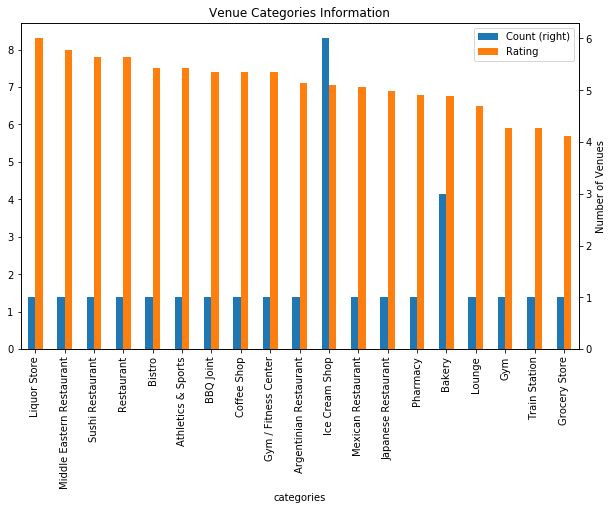

In [41]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


pmg.plot(kind='bar', secondary_y= 'Count', figsize=(10, 6))
plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Venue Categories Information') # add title to the plot
plt.show()



##  3.2.5) First Conclusion : Based on this information, we need to explore "Grocery Store", "Lounge" , "Pharmacy"

In [15]:
explo = data_pm[(data_pm["categories"] == "Grocery Store") | (data_pm["categories"] == "Lounge")| (data_pm["categories"] == "Pharmacy")]

explo

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Rating
54,Farmacity,Pharmacy,Triunvirato 4451,AR,Villa Urquiza,Argentina,e/ Av. Olazabal y Mendoza,796,"[Triunvirato 4451 (e/ Av. Olazabal y Mendoza),...","[{'label': 'display', 'lat': -34.5760687832438...",-34.576069,-58.483499,NaN,NaN,Buenos Aires C.F.,4e271da281dc82d74b8a7877,6.8
64,Espacio Idear,Lounge,Mendoza 5846,AR,Villa Urquiza,Argentina,NaN,947,"[Mendoza 5846, Villa Urquiza, CABA, Argentina]","[{'label': 'display', 'lat': -34.5817462168378...",-34.581746,-58.490999,NaN,NaN,CABA,4ea57f8c490102dac3e12c99,6.5
75,Coto,Grocery Store,Monroe 5055,AR,Villa Urquiza,Argentina,e/ Díaz Colodrero y Av. Triunvirato,506,[Monroe 5055 (e/ Díaz Colodrero y Av. Triunvir...,"[{'label': 'display', 'lat': -34.573925, 'lng'...",-34.573925,-58.486020,"Villa Urquiza, Buenos Aires, Buenos Aires F.D.",C1431CAO,Buenos Aires C.F.,4b58ebbff964a520127328e3,5.7
92,Supermercado Chino,Grocery Store,Av. Triunvirato,AR,Villa Urquiza,Argentina,Piran,811,"[Av. Triunvirato (Piran), Villa Urquiza, Bueno...","[{'label': 'display', 'lat': -34.5663816550479...",-34.566382,-58.494468,NaN,NaN,Buenos Aires C.F.,4db0b8344b22ba776d74d333,NaN


#### ----  We can conclude from this table that there is a need for improvement in “Grocery Store”, “Pharmacy” and “Lounge”. 
#### ---- Exploring the “Grocery Store” and “Pharmacy” venues, we discover that they have a big player, which makes competition very difficult. (Google search with the name venues.)


# 3.3) Exploring the Lounge category:

In [16]:
data_lounge = data_pm[data_pm["categories"] == "Lounge"]
data_lounge

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Rating
64,Espacio Idear,Lounge,Mendoza 5846,AR,Villa Urquiza,Argentina,NaN,947,"[Mendoza 5846, Villa Urquiza, CABA, Argentina]","[{'label': 'display', 'lat': -34.5817462168378...",-34.581746,-58.490999,NaN,NaN,CABA,4ea57f8c490102dac3e12c99,6.5


### 3.3.1) Location of the lounge

In [17]:
# create map of New York using latitude and longitude values
map_pm1 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map


for lat, lng, category in zip(data_pm['lat'], data_pm['lng'],data_pm["categories"]):
    label = '{}'.format(category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pm1)  
    
for lat, lng, category in zip(data_lounge['lat'], data_lounge['lng'],data_lounge["categories"]):
    label = '{}'.format(category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pm1)     


map_pm1


### 3.3.2) Venue Information

In [18]:
venue_id = "4ea57f8c490102dac3e12c99"
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()


result

{'meta': {'code': 200, 'requestId': '5d37a5618ad62e0039d07461'},
 'response': {'venue': {'id': '4ea57f8c490102dac3e12c99',
   'name': 'Espacio Idear',
   'contact': {},
   'location': {'address': 'Mendoza 5846',
    'lat': -34.581746216837864,
    'lng': -58.49099904432911,
    'labeledLatLngs': [{'label': 'display',
      'lat': -34.581746216837864,
      'lng': -58.49099904432911}],
    'cc': 'AR',
    'city': 'Villa Urquiza',
    'state': 'CABA',
    'country': 'Argentina',
    'formattedAddress': ['Mendoza 5846',
     'Villa Urquiza',
     'CABA',
     'Argentina']},
   'canonicalUrl': 'https://foursquare.com/v/espacio-idear/4ea57f8c490102dac3e12c99',
   'categories': [{'id': '4bf58dd8d48988d121941735',
     'name': 'Lounge',
     'pluralName': 'Lounges',
     'shortName': 'Lounge',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_',
      'suffix': '.png'},
     'primary': True}],
   'verified': False,
   'stats': {'tipCount': 1},
   'price': {'tie

#### - Based on information, is an medium - expensive lounge (3 $ / 5), further onine search
#### - Resulted in a low service quality. Good quality building

# 4) CONCLUSION:
#### - Based in the analysis and information available, the most convenient investment in Villa Urquiza is a Lounge. 
#### - There a lack in competition. Focus should rely in a high quality service, plus convenient installations and center location.
